# CORD-19 Software Mentions

A notebook to explore the dataset and output some lightly processed data

## Setup imports and files

In [1]:
import numpy as np
import pandas as pd
import csv
import ast
import collections
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
CORD19_CSVFILE = '../data/cord-19/CORD19_software_mentions.csv'
POPULARITY_CSVFILE = '../data/output/CORD19_software_popularity.csv'

## Have a quick look at the data using pandas

In [3]:
df = pd.read_csv(CORD19_CSVFILE)
df.head()

,paper_id,doi,title,source_x,license,publish_time,journal,url,software
0,00006903b396d50cc0037fed39916d57d50ee801,NaN,Urban green space and happiness in developed c...,ArXiv,arxiv,2021-01-04,NaN,https://arxiv.org/pdf/2101.00807v1.pdf,['Google Street View']
1,0000fcce604204b1b9d876dc073eb529eb5ce305,10.1016/j.regg.2021.01.002,La Geriatría de Enlace con residencias en la é...,Elsevier; PMC,els-covid,2021-01-13,Rev Esp Geriatr Gerontol,https://api.elsevier.com/content/article/pii/S...,['SEGG']
2,000122a9a774ec76fa35ec0c0f6734e7e8d0c541,10.1016/j.rec.2020.08.002,Impact of COVID-19 on ST-segment elevation myo...,Elsevier; Medline; PMC,no-cc,2020-09-08,Rev Esp Cardiol (Engl Ed),https://api.elsevier.com/content/article/pii/S...,"['STATA', 'IAMCEST']"
3,0001418189999fea7f7cbe3e82703d71c85a6fe5,10.1016/j.vetmic.2006.11.026,Absence of surface expression of feline infect...,Elsevier; Medline; PMC,no-cc,2007-03-31,Vet Microbiol,https://www.sciencedirect.com/science/article/...,['SPSS']
4,00033d5a12240a8684cfe943954132b43434cf48,10.3390/v12080849,Detection of Severe Acute Respiratory Syndrome...,Medline; PMC,cc-by,2020-08-04,Viruses,https://www.ncbi.nlm.nih.gov/pubmed/32759673/;...,"['R', 'MassARRAY Typer Analyzer']"


## Load the data and extract the software mentions

In [4]:
software = []

with open(CORD19_CSVFILE, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        mentions = set(ast.literal_eval(row['software']))
        for mention in mentions:
            software.append(mention)
        

In [5]:
software

['Google Street View',
 'SEGG',
 'STATA',
 'IAMCEST',
 'SPSS',
 'MassARRAY Typer Analyzer',
 'R',
 'SPSS Statistics',
 'Wechat',
 'BD CBA',
 'Statistical Package for Social Sciences (SPSS)',
 'Statacorp',
 'STATA',
 'SPSS',
 'Cellranger',
 'GraphPad Prism',
 'geNorm',
 'Seurat',
 'ggplot2',
 'LinRegPCR',
 'GraphPad',
 'R',
 'GramA',
 'R package ALDEx2',
 'FastQC',
 'ImageJ',
 'PfAlbas',
 'STAR',
 'R package edgeR',
 'SAM',
 'MORO',
 'MORO Praxis',
 'R2HC',
 'Singapour',
 'PRESET',
 'GT',
 'Google Trends (GT',
 'VICTIMES',
 'SINUS',
 'Spirocall',
 'LIBSVM',
 'MATLAB voicebox',
 'openS',
 'MILE',
 'DP',
 'DSGVO',
 'PEPP',
 '3T',
 'PT',
 'iOS',
 'REDCapbased',
 'R',
 'REDCap',
 'Research Electronic Data Capture',
 'INCART',
 'DDCNN',
 'AR',
 'BIH',
 'SOMTE',
 'MIT',
 'SMOTE',
 'Adam',
 'CLSM',
 'SUP',
 'SPSS',
 'CT Scan',
 'NCCS',
 'FlowJo',
 'GraphPad',
 'Zen Zeiss',
 'GraphPad Prism',
 'MCT',
 'Seq',
 'Ribo',
 'LOOCV',
 'branch',
 'HDP',
 'Random Forest',
 'Mbranch',
 'NEAR',
 'LAMP',
 

## Take a quick look at the statistics

In [6]:
occurrences = collections.Counter(software)

print(occurrences)

Counter({'SPSS': 7401, 'R': 6932, 'GraphPad Prism': 3368, 'Excel': 3161, 'SAS': 2414, 'Stata': 2012, 'GraphPad': 1991, 'BLAST': 1979, 'Google Scholar': 1540, 'MEGA': 1309, 'ImageJ': 1222, 'STATA': 1215, 'SPSS Statistics': 1170, 'Python': 1064, 'MATLAB': 1041, 'Prism': 988, 'Scopus': 969, 'FlowJo': 775, 'MAFFT': 662, 'ClustalW': 655, 'GISAID': 648, 'Matlab': 620, 'REDCap': 613, 'Skype': 535, 'Qualtrics': 509, 'PyMOL': 490, 'Cytoscape': 444, 'BioEdit': 437, 'MUSCLE': 428, 'Geneious': 405, 'ggplot2': 398, 'Net': 398, 'Linux': 397, 'PRISMA': 373, 'Google Forms': 373, 'Image J': 359, 'BEAST': 356, 'GROMACS': 355, 'NVivo': 345, 'Windows': 339, 'Clustal Omega': 337, 'MedCalc': 328, 'Ensembl': 327, 'UCSF Chimera': 321, 'RStudio': 315, 'SWISS': 311, 'Google Trends': 311, 'Chimera': 295, 'learn': 292, 'MODEL': 290, 'ArcGIS': 290, 'BLASTn': 288, 'AutoDock Vina': 281, 'Graphpad Prism': 280, 'PhyML': 279, 'R Foundation for Statistical Computing': 271, 'R package': 268, 'DESeq2': 266, 'AutoDock': 26

In [7]:
common_software = occurrences.most_common(20)

In [8]:
common_software

[('SPSS', 7401),
 ('R', 6932),
 ('GraphPad Prism', 3368),
 ('Excel', 3161),
 ('SAS', 2414),
 ('Stata', 2012),
 ('GraphPad', 1991),
 ('BLAST', 1979),
 ('Google Scholar', 1540),
 ('MEGA', 1309),
 ('ImageJ', 1222),
 ('STATA', 1215),
 ('SPSS Statistics', 1170),
 ('Python', 1064),
 ('MATLAB', 1041),
 ('Prism', 988),
 ('Scopus', 969),
 ('FlowJo', 775),
 ('MAFFT', 662),
 ('ClustalW', 655)]

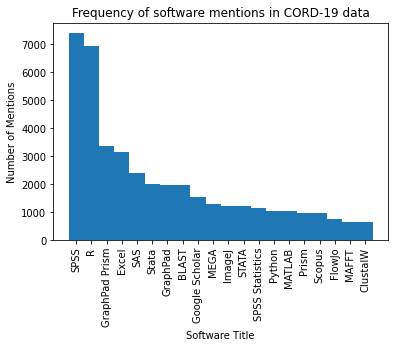

In [9]:
labels, ys = zip(*common_software)
xs = np.arange(len(labels)) 
width = 1

plt.bar(xs, ys, width, align='center')
plt.title('Frequency of software mentions in CORD-19 data')
plt.xlabel('Software Title')
plt.ylabel('Number of Mentions')

plt.xticks(xs, labels, rotation='vertical')
#plt.yticks(ys)
plt.show()

## Display the world cloud

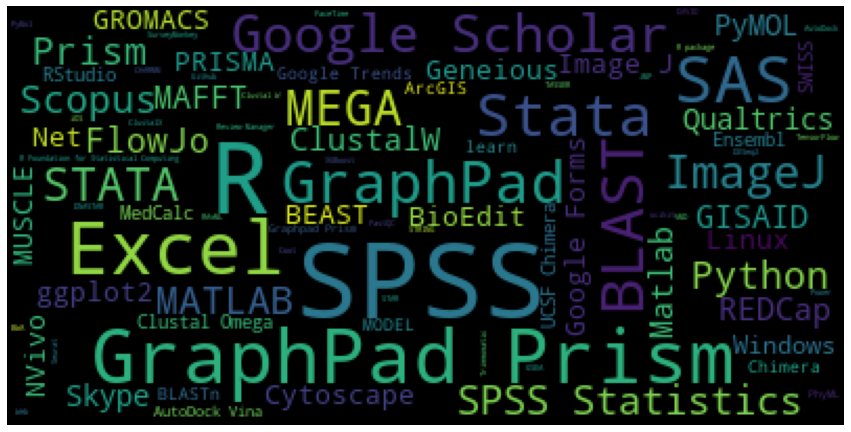

In [10]:
wordcloud = WordCloud(max_font_size=50).generate_from_frequencies(occurrences)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Output the slightly processed data

In [11]:
with open(POPULARITY_CSVFILE, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for row in occurrences.most_common(len(occurrences)):
        writer.writerow(row)
        